In [83]:
# Importar la librería numpy para los cálculos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
# definir función pora calcular valores de la matriz de confusión
def construir_matriz_confusion(precision, recall,total_examples,positives):

  #paso 1. Calcular los elementos de la matriz de confusión
  # Calcular TP + FN (número total de positivos reales)
  tp_fn = positives

  # Calcular TP usando el valor de recall
  tp = recall * tp_fn

  # Calcular FN (Falsos Negativos)
  fn = tp_fn - tp

  # Calcular TP + FP usando el valor de precisión
  tp_fp = tp / precision

  # Calcular FP (Falsos Positivos)
  fp = tp_fp - tp

  # Calcular TN (Verdaderos Negativos)
  tn = total_examples - (tp + fp + fn)
  tn_rounded = round(tn)
  fp_rounded = round(fp)
  fn_rounded = round(fn)
  tp_rounded = round(tp)
  # Mostrar los resultados de la matriz de confusión
  #print(f"True Positives (TP): {tp_rounded}")
  #print(f"False Positives (FP): {fp_rounded}")
  #print(f"False Negatives (FN): {fn_rounded}")
  #print(f"True Negatives (TN): {tn_rounded}")



# Crea la matriz de confusión
  confusion_matrix = np.array([[tn_rounded, fp_rounded], [fn_rounded, tp_rounded]])

  return confusion_matrix

  # return np.array([[tn, fp], [fn, tp]])

In [16]:
# abrir el  de metadatos de imágenes para calcular la cantidad de true_positives y total de imagenes
urlDataset= '/content/metadatos_actualizados_sin_nv_reducidos.csv'

df= pd.read_csv(urlDataset)

#calcular total de registros del dataset
total_registros = len(df)
print("Total de registros:", total_registros)


#calcular total de imagenes etiquetadas como lesión maligna
total_malignas = df[df['classification'] == 'lesión maligna'].shape[0]

print(f'Cantidad de registros con lesión maligna: {total_malignas}')


Total de registros: 5021
Cantidad de registros con lesión maligna: 2507


In [92]:
#abrir el dataset con la información de los resultados
# se trata de un archivo con las métricas de cada época de cada fold
#['Fold', 'Epoch', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

#urlResultados ='/content/resultados.csv'
#urlResultados ='resultadosModel1-soloDatosEpocas.csv'
urlResultados = 'https://raw.githubusercontent.com/mariaelisaaraya/M1000IA/refs/heads/master/resultados_pruebas-DelEquipo/resultadosSemana15_10/PruebasKa/resultadosModel1-soloDatosEpocas.csv'
dfResultados = pd.read_csv(urlResultados)



### Cálculo de la matriz de confusión con métricas finales

Resultados de época:  40 (última) del fold:  5  (último)

Perdida: 0.26
Accuracy: 0.92
Precisión: 0.92
Recall: 0.92
F1 Score: 0.92


Matriz de confusión :


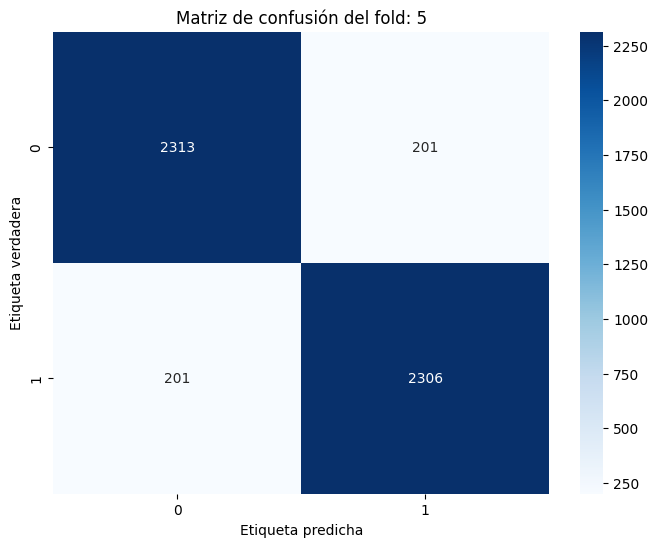

In [95]:
# Paso 1: obtener las métricas de la última época del último fold

ultimo_resultado = dfResultados.iloc[-1]

epoca = round(ultimo_resultado['Epoch'])
fold = round(ultimo_resultado['Fold'])
perdida = round(ultimo_resultado['Loss'],2)
accuracy = round(ultimo_resultado['Accuracy'],2)
precision = round( ultimo_resultado['Precision'],2)
recall = round(ultimo_resultado['Recall'],2)
f1score = round(ultimo_resultado['F1 Score'],2)

print("Resultados de época: ", epoca, "(última) del fold: ",fold," (último)\n")
print(f'Perdida: {perdida}')
print(f'Accuracy: {accuracy}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}\n')



# Calcular matriz
total_confusion_matrix  = construir_matriz_confusion(precision, recall,total_registros ,total_malignas)
print("\nMatriz de confusión :")


strTitle = "Matriz de confusión del fold: " + str(round(fold))

plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.title(strTitle)
plt.show()


### Calcular matriz de confusión a partir de las últimas métricas de cada fold.


Resultados de época:  40  del fold:  1  

Métricas: 

Perdida: 0.44
Accuracy: 0.8
Precisión: 0.81
Recall: 0.8
F1 Score: 0.8


Matriz de confusión fold:  1 



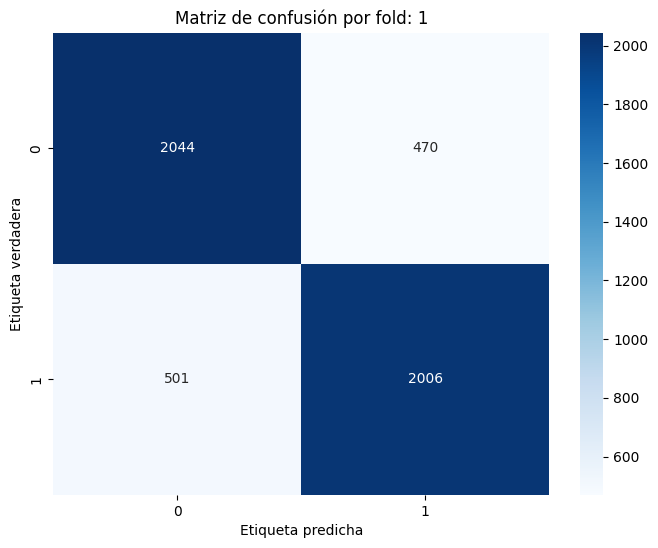


Resultados de época:  40  del fold:  2  

Métricas: 

Perdida: 0.37
Accuracy: 0.83
Precisión: 0.83
Recall: 0.83
F1 Score: 0.83


Matriz de confusión fold:  2 



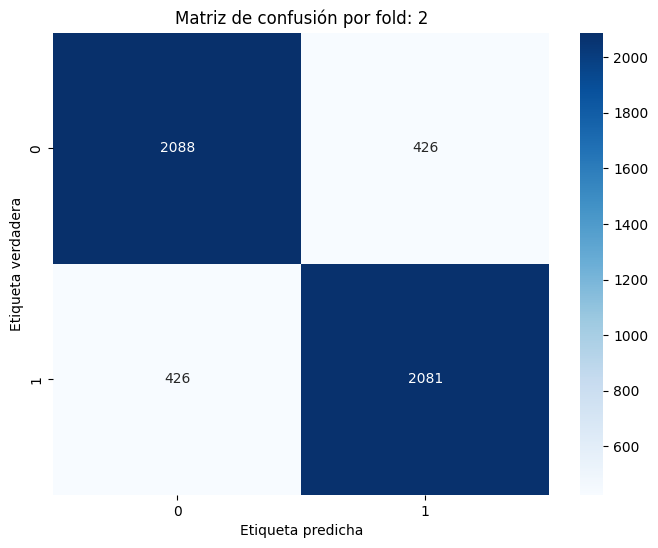


Resultados de época:  40  del fold:  3  

Métricas: 

Perdida: 0.34
Accuracy: 0.87
Precisión: 0.87
Recall: 0.87
F1 Score: 0.87


Matriz de confusión fold:  3 



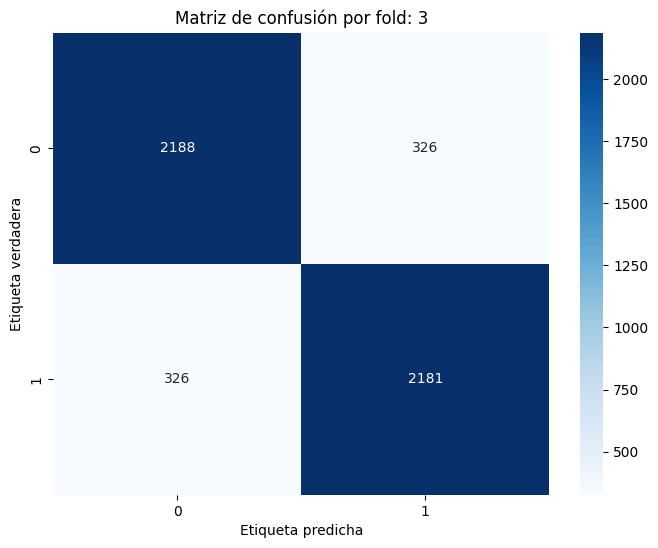


Resultados de época:  40  del fold:  4  

Métricas: 

Perdida: 0.29
Accuracy: 0.88
Precisión: 0.88
Recall: 0.88
F1 Score: 0.88


Matriz de confusión fold:  4 



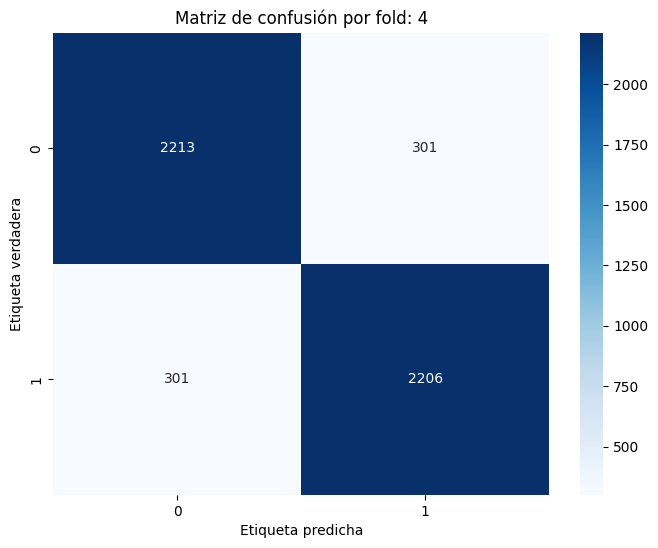


Resultados de época:  40  del fold:  5  

Métricas: 

Perdida: 0.26
Accuracy: 0.92
Precisión: 0.92
Recall: 0.92
F1 Score: 0.92


Matriz de confusión fold:  5 



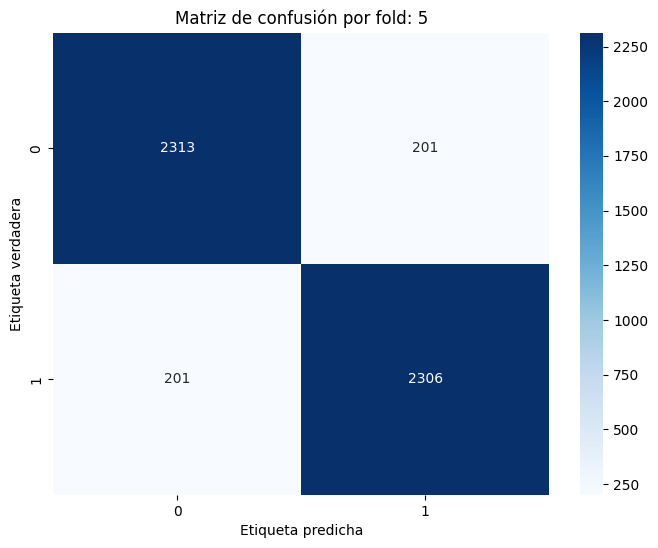

In [97]:
# obtener las métricas de la última época de cada fold

ultimo_epoca_por_fold = dfResultados.groupby('Fold').last().reset_index()

#print(ultimo_epoca_por_fold)

# calcular matriz de cada una

for index, row in ultimo_epoca_por_fold.iterrows():
  epoca = round(row['Epoch'])
  fold = round(row['Fold'])
  perdida = round(row['Loss'],2)
  accuracy = round(row['Accuracy'],2)
  precision = round(row['Precision'],2)
  recall = round(row['Recall'],2)
  f1score = round(row['F1 Score'],2)

  print("\nResultados de época: ", epoca, " del fold: ",fold," \n")
  print("Métricas: \n")
  print(f'Perdida: {perdida}')
  print(f'Accuracy: {accuracy}')
  print(f'Precisión: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1score}\n')

  # Calcular matriz
  total_confusion_matrix  = construir_matriz_confusion(precision, recall,total_registros ,total_malignas)
  print("\nMatriz de confusión fold: ", round(fold),"\n")
#  print(total_confusion_matrix)
  strTitle = "Matriz de confusión por fold: " + str(round(fold))

  plt.figure(figsize=(8, 6))
  sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues")
  plt.ylabel('Etiqueta verdadera')
  plt.xlabel('Etiqueta predicha')
  plt.title(strTitle)
  plt.show()



### Calcular matriz de confusión considerando el promedio de las métricas de todas las épocas de todos los folders


Promedio de métricas de todas las épocas de todos los folders: 
Promedio de Precisión: 0.84
Promedio de Recall: 0.84
Promedio de Pérdida: 0.38
Promedio de Accuracy: 0.84

Matriz de confusión fold:  4 



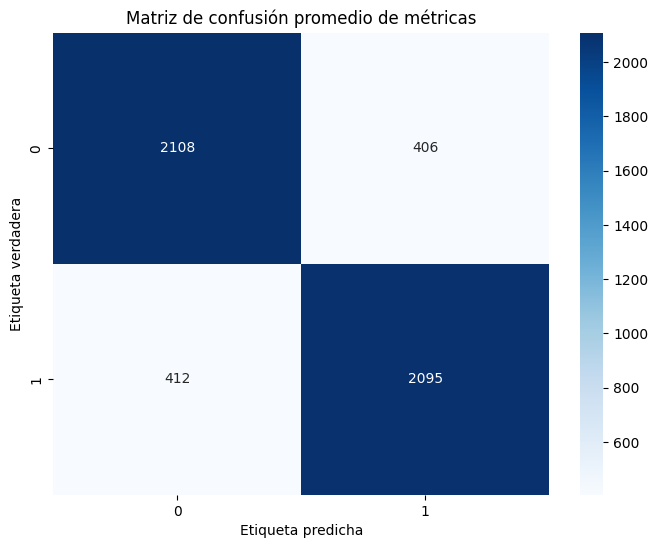

In [103]:
# armar lista de métricas de precisión y recall por épocas y folders

# Crear una lista vacía para la matriz de precisión
precision_epochs_folders = []
recall_epochs_folders = []
perdida_epochs_folders = []
accuracy_epochs_folders = []

# Iterar sobre los 5 folds (0, 1, 2, 3, 4)
for fold in range(5):
    # Filtrar el DataFrame por el fold actual
    fold_data = dfResultados[dfResultados['Fold'] == (fold+1)]

    # Obtener la precisión de cada época para el fold actual
    precision_values = fold_data['Precision'].tolist()
    recall_values = fold_data['Recall'].tolist()
    perdida_values = fold_data['Loss'].tolist()
    accuracy_values = fold_data['Accuracy'].tolist()

    # Agregar los valores de precisión a la matriz
    precision_epochs_folders.append(precision_values)
    recall_epochs_folders.append(recall_values)
    perdida_epochs_folders.append(perdida_values)
    accuracy_epochs_folders.append(accuracy_values)



# Calcular el promedio de precisión y recall
average_precision = np.mean([np.mean(precisions) for precisions in precision_epochs_folders])
average_recall = np.mean([np.mean(recalls) for recalls in recall_epochs_folders])
average_perdida = np.mean([np.mean(perdidas) for perdidas in perdida_epochs_folders])
average_accuracy = np.mean([np.mean(accuracies) for accuracies in accuracy_epochs_folders])

# Imprimir los resultados
print("\nPromedio de métricas de todas las épocas de todos los folders: ")
print(f"Promedio de Precisión: {round(average_precision,2)}")
print(f"Promedio de Recall: {round(average_recall,2)}")
print(f"Promedio de Pérdida: {round(average_perdida,2)}")
print(f"Promedio de Accuracy: {round(average_accuracy,2)}")



# Calcular matriz
total_confusion_matrix  = construir_matriz_confusion(average_precision, average_recall, total_registros ,total_malignas)
print("\nMatriz de confusión fold: ", round(fold),"\n")



plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de confusión promedio de métricas')
plt.show()

